<a href="https://colab.research.google.com/github/Sdalsa/SimpleCNN-10-monkey/blob/main/SimpleCNN_10_monkey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 

import os
print(os.listdir("../input"))
from glob import glob
import cv2
import matplotlib.pylab as plt
import keras
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization, Input
from keras.models import Sequential
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from pathlib import Path
from keras.optimizers import Adam,RMSprop,SGD

['vgg16', 'keras-pretrained-models', '10-monkey-species']


/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [ ]:
df = pd.read_csv("../input/10-monkey-species/monkey_labels.txt")
df.head()

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26


In [ ]:
height=150
width=150
batch_size=32     
seed=1337

train_dir = Path('../input/10-monkey-species/training/training/')
test_dir = Path('../input/10-monkey-species/validation/validation/')

# First we rescale the img and gives afterward we use image argumentation 
train_datagen = ImageDataGenerator(rotation_range = 30       
                                   ,rescale=1. / 255,
                                   shear_range=0.5,
                                   zoom_range=0.1 )


train_generator = train_datagen.flow_from_directory(train_dir, #load data 
                                                    target_size=(height,width), 
                                                    batch_size=batch_size,  # The number of image given at ones 
                                                    seed=seed,
                                                    class_mode='categorical') # We are classifing images into different categories


# Test generator we do the same as in train_generator without image argumentation. 
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(height,width), 
                                                  batch_size=batch_size,
                                                  seed=seed,
                                                  class_mode='categorical')

Found 1097 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


(367, 550, 3)


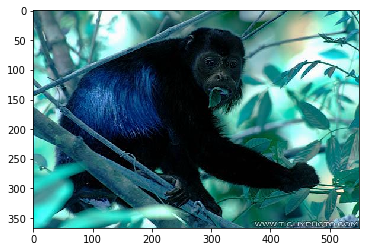

In [ ]:
import matplotlib.pylab as plt
img = cv2.imread('../input/10-monkey-species/training/training/n0/n0018.jpg')
print(img.shape)
plt.imshow(img);

# Add first layer

In [ ]:
model = Sequential()
model.add(Conv2D(12, kernel_size=(3,3),
                 activation='relu',
                 input_shape=(150,150,3)))

# Add the remaining layers

In [ ]:
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))                    # Drop nodes and make new connections
model.add(Dense(256,activation='relu'))    # Relu means rectified linear unit and is y=max(0, x) and 'Dense' means how dense you want the model in the given activation
model.add(Dense(10, activation='softmax')) # Softmax turns it into properbelities

# Compile Your Model & Fit The Model

In [ ]:
model.compile(optimizer = 'adam',loss="categorical_crossentropy", metrics=["accuracy"])   # (Adam(lr=0.0001)) here it is lr=learning rate
# compile tells tenserflow how to update the dense connections, when we are training on the data
fitting_model = model.fit_generator(train_generator,
                    steps_per_epoch = 1097//batch_size, # 1097 = train size
                    validation_data = test_generator, 
                    validation_steps = 272//batch_size, # 272 = validation size
                    epochs = 2,                       # Epochs (Number of times we go through out dataset) 
                    verbose  = 1)                     # verbose (a repporter that use info while traning, 0=nothing, 1=a (bar of proces), 2=the number of runs it will take)

Epoch 1/2
34/34 [==============================] - 48s 1s/step - loss: 13.9726 - acc: 0.0979 - val_loss: 14.5441 - val_acc: 0.0977
Epoch 2/2
34/34 [==============================] - 45s 1s/step - loss: 14.5764 - acc: 0.0956 - val_loss: 14.5441 - val_acc: 0.0977


This gave us a low acc, but if further improvement could be made. 

If we changed the numbers of epoch or the activation layers or validation_steps. 

This kernel is a simple CNN model.